In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("amazon.csv")

# Display basic info
print("Before cleaning:\n")
print(df.info())


Before cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   

In [2]:
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).replace('', '0').astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).replace('', '0').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').replace('', '0').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '').replace('', '0').astype(float)

In [3]:
df = df.dropna(subset=['rating', 'discounted_price', 'rating_count'])

print("\nAfter cleaning:")
print(df.info())


After cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 

In [4]:


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


df['about_product'] = df['about_product'].fillna('')
df['category'] = df['category'].fillna('')
df['product_name'] = df['product_name'].fillna('')

# Step 2: Combine fields for content-based filtering
df['combined'] = df['product_name'] + ' ' + df['category'] + ' ' + df['about_product']


tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])


cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


indices = pd.Series(df.index, index=df['product_name']).drop_duplicates()


In [5]:

def recommend_products(product_name, n=5):
    idx = indices.get(product_name)
    if idx is None:
        return "Product not found. Try another name."

   
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]  

    product_indices = [i[0] for i in sim_scores]
    return df[['product_name', 'category', 'discounted_price']].iloc[product_indices]


recommend_products("SanDisk Cruzer Blade 32GB USB Flash Drive'")


'Product not found. Try another name.'

In [6]:
print("Descriptive statistics:")
print(df[['rating', 'discounted_price', 'actual_price', 'discount_percentage', 'rating_count']].describe())


print("\nTop 5 categories:")
print(df['category'].value_counts().head())


print("\nNumber of duplicate rows:", df.duplicated().sum())

Descriptive statistics:
            rating  discounted_price   actual_price  discount_percentage  \
count  1462.000000       1462.000000    1462.000000          1462.000000   
mean      4.096717       3129.981826    5453.087743            47.672367   
std       0.289497       6950.548042   10884.467444            21.613905   
min       2.000000         39.000000      39.000000             0.000000   
25%       4.000000        325.000000     800.000000            32.000000   
50%       4.100000        799.000000    1670.000000            50.000000   
75%       4.300000       1999.000000    4321.250000            63.000000   
max       5.000000      77990.000000  139900.000000            94.000000   

        rating_count  
count    1462.000000  
mean    18307.376881  
std     42766.096572  
min         2.000000  
25%      1191.500000  
50%      5179.000000  
75%     17342.250000  
max    426973.000000  

Top 5 categories:
category
Computers&Accessories|Accessories&Peripherals|Cables&Acc

Text(0.5, 1.0, 'Product Ratings Distribution')

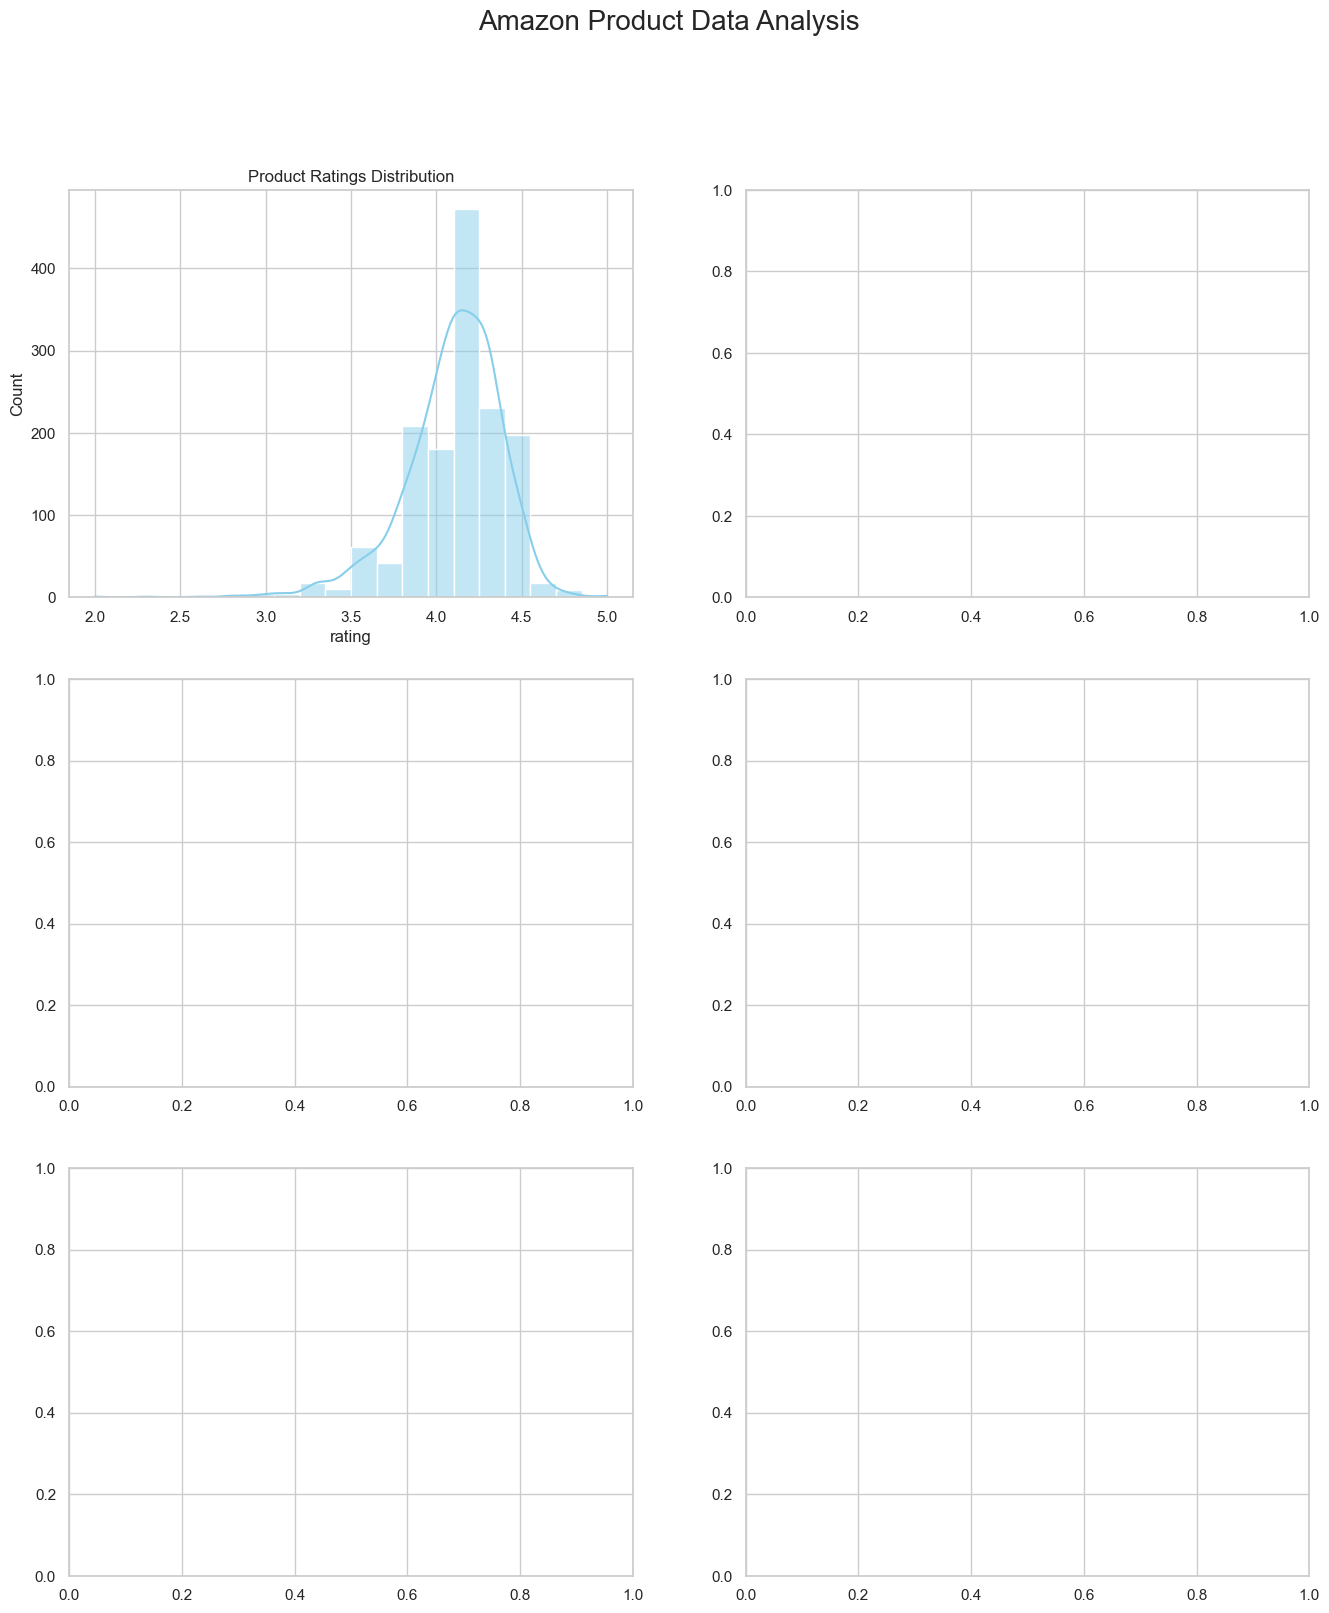

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Amazon Product Data Analysis", fontsize=20)

sns.histplot(df['rating'], bins=20, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Product Ratings Distribution")

Text(0.5, 1.0, 'Discounted Price Distribution')

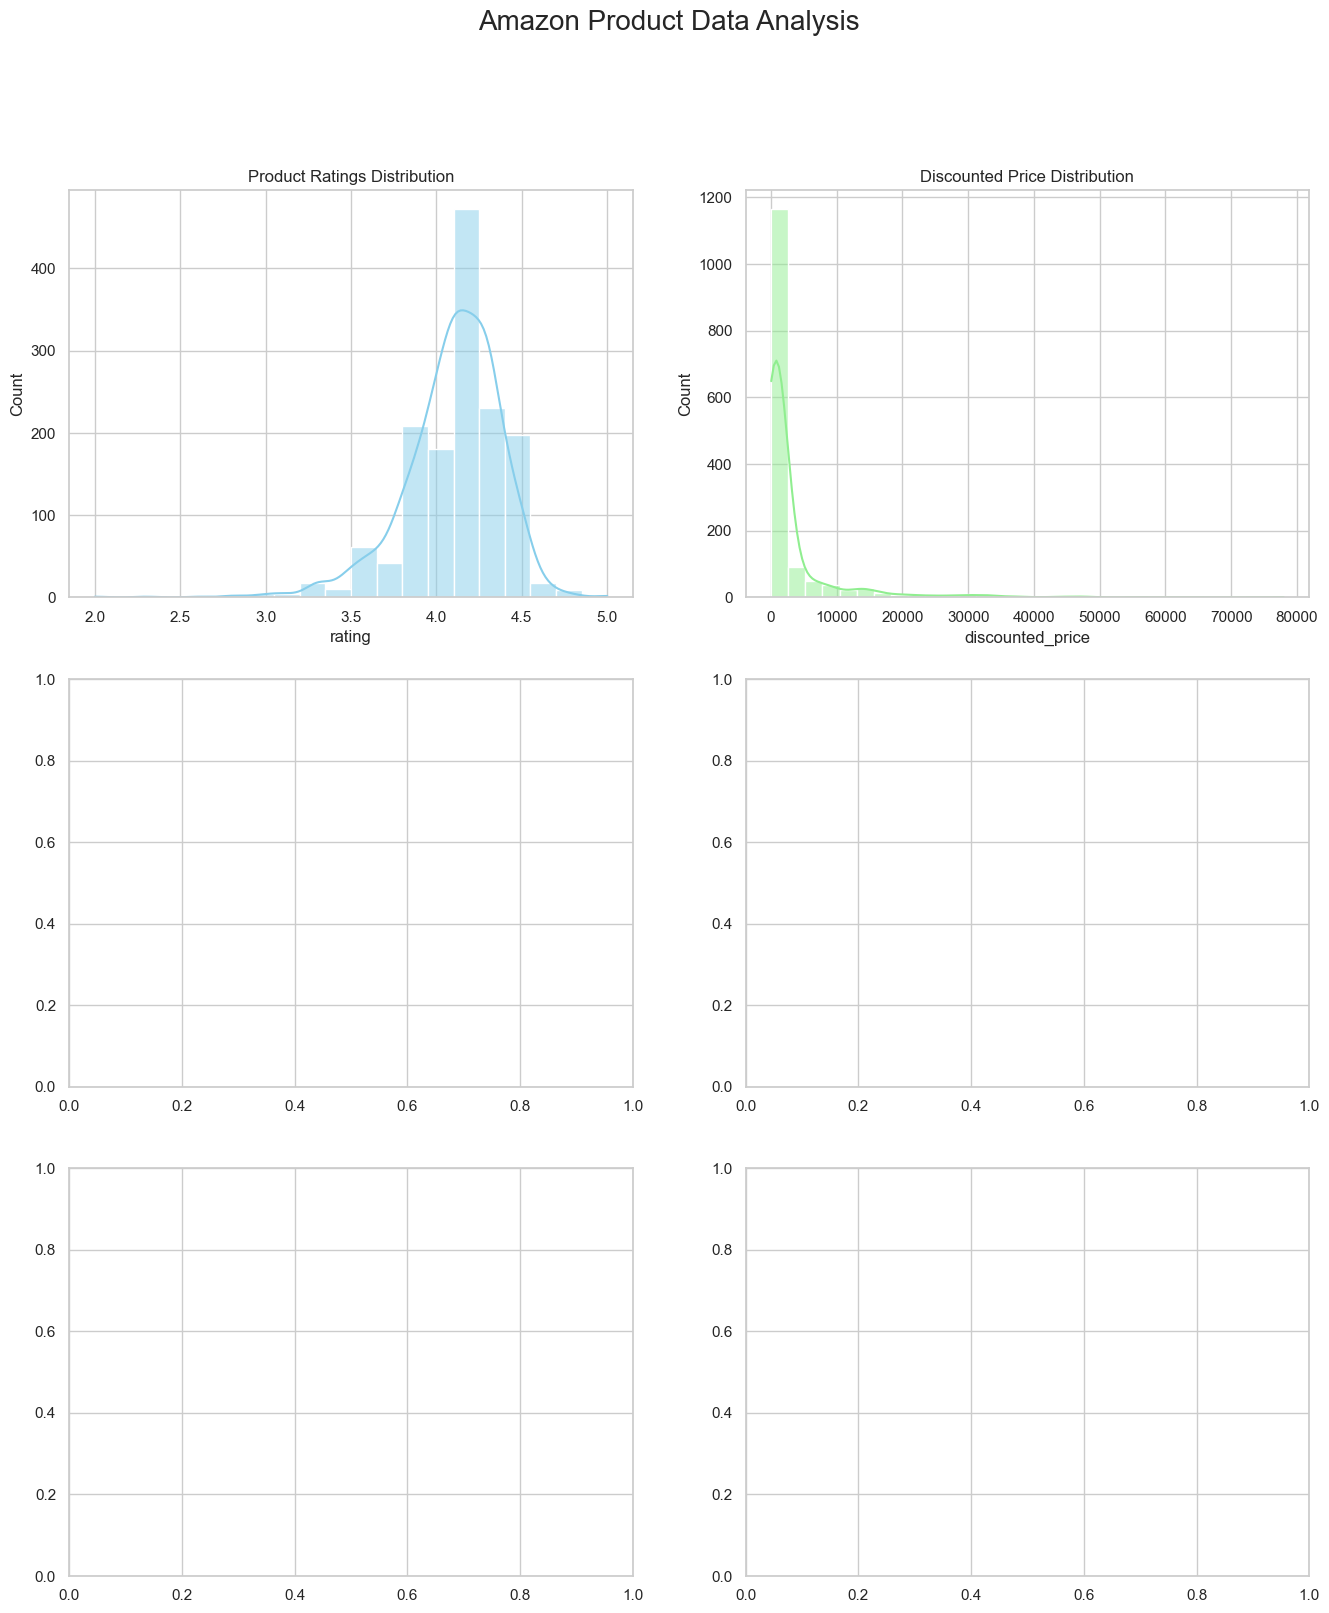

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Amazon Product Data Analysis", fontsize=20)

sns.histplot(df['rating'], bins=20, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Product Ratings Distribution")


sns.histplot(df['discounted_price'], bins=30, kde=True, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title("Discounted Price Distribution")

C:\Users\kanis\AppData\Local\Temp\ipykernel_20452\1375400619.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reviews, y="product_name", x="rating_count", ax=axs[1, 0], palette="viridis")


Text(0.5, 1.0, 'Top 10 Most Reviewed Products')

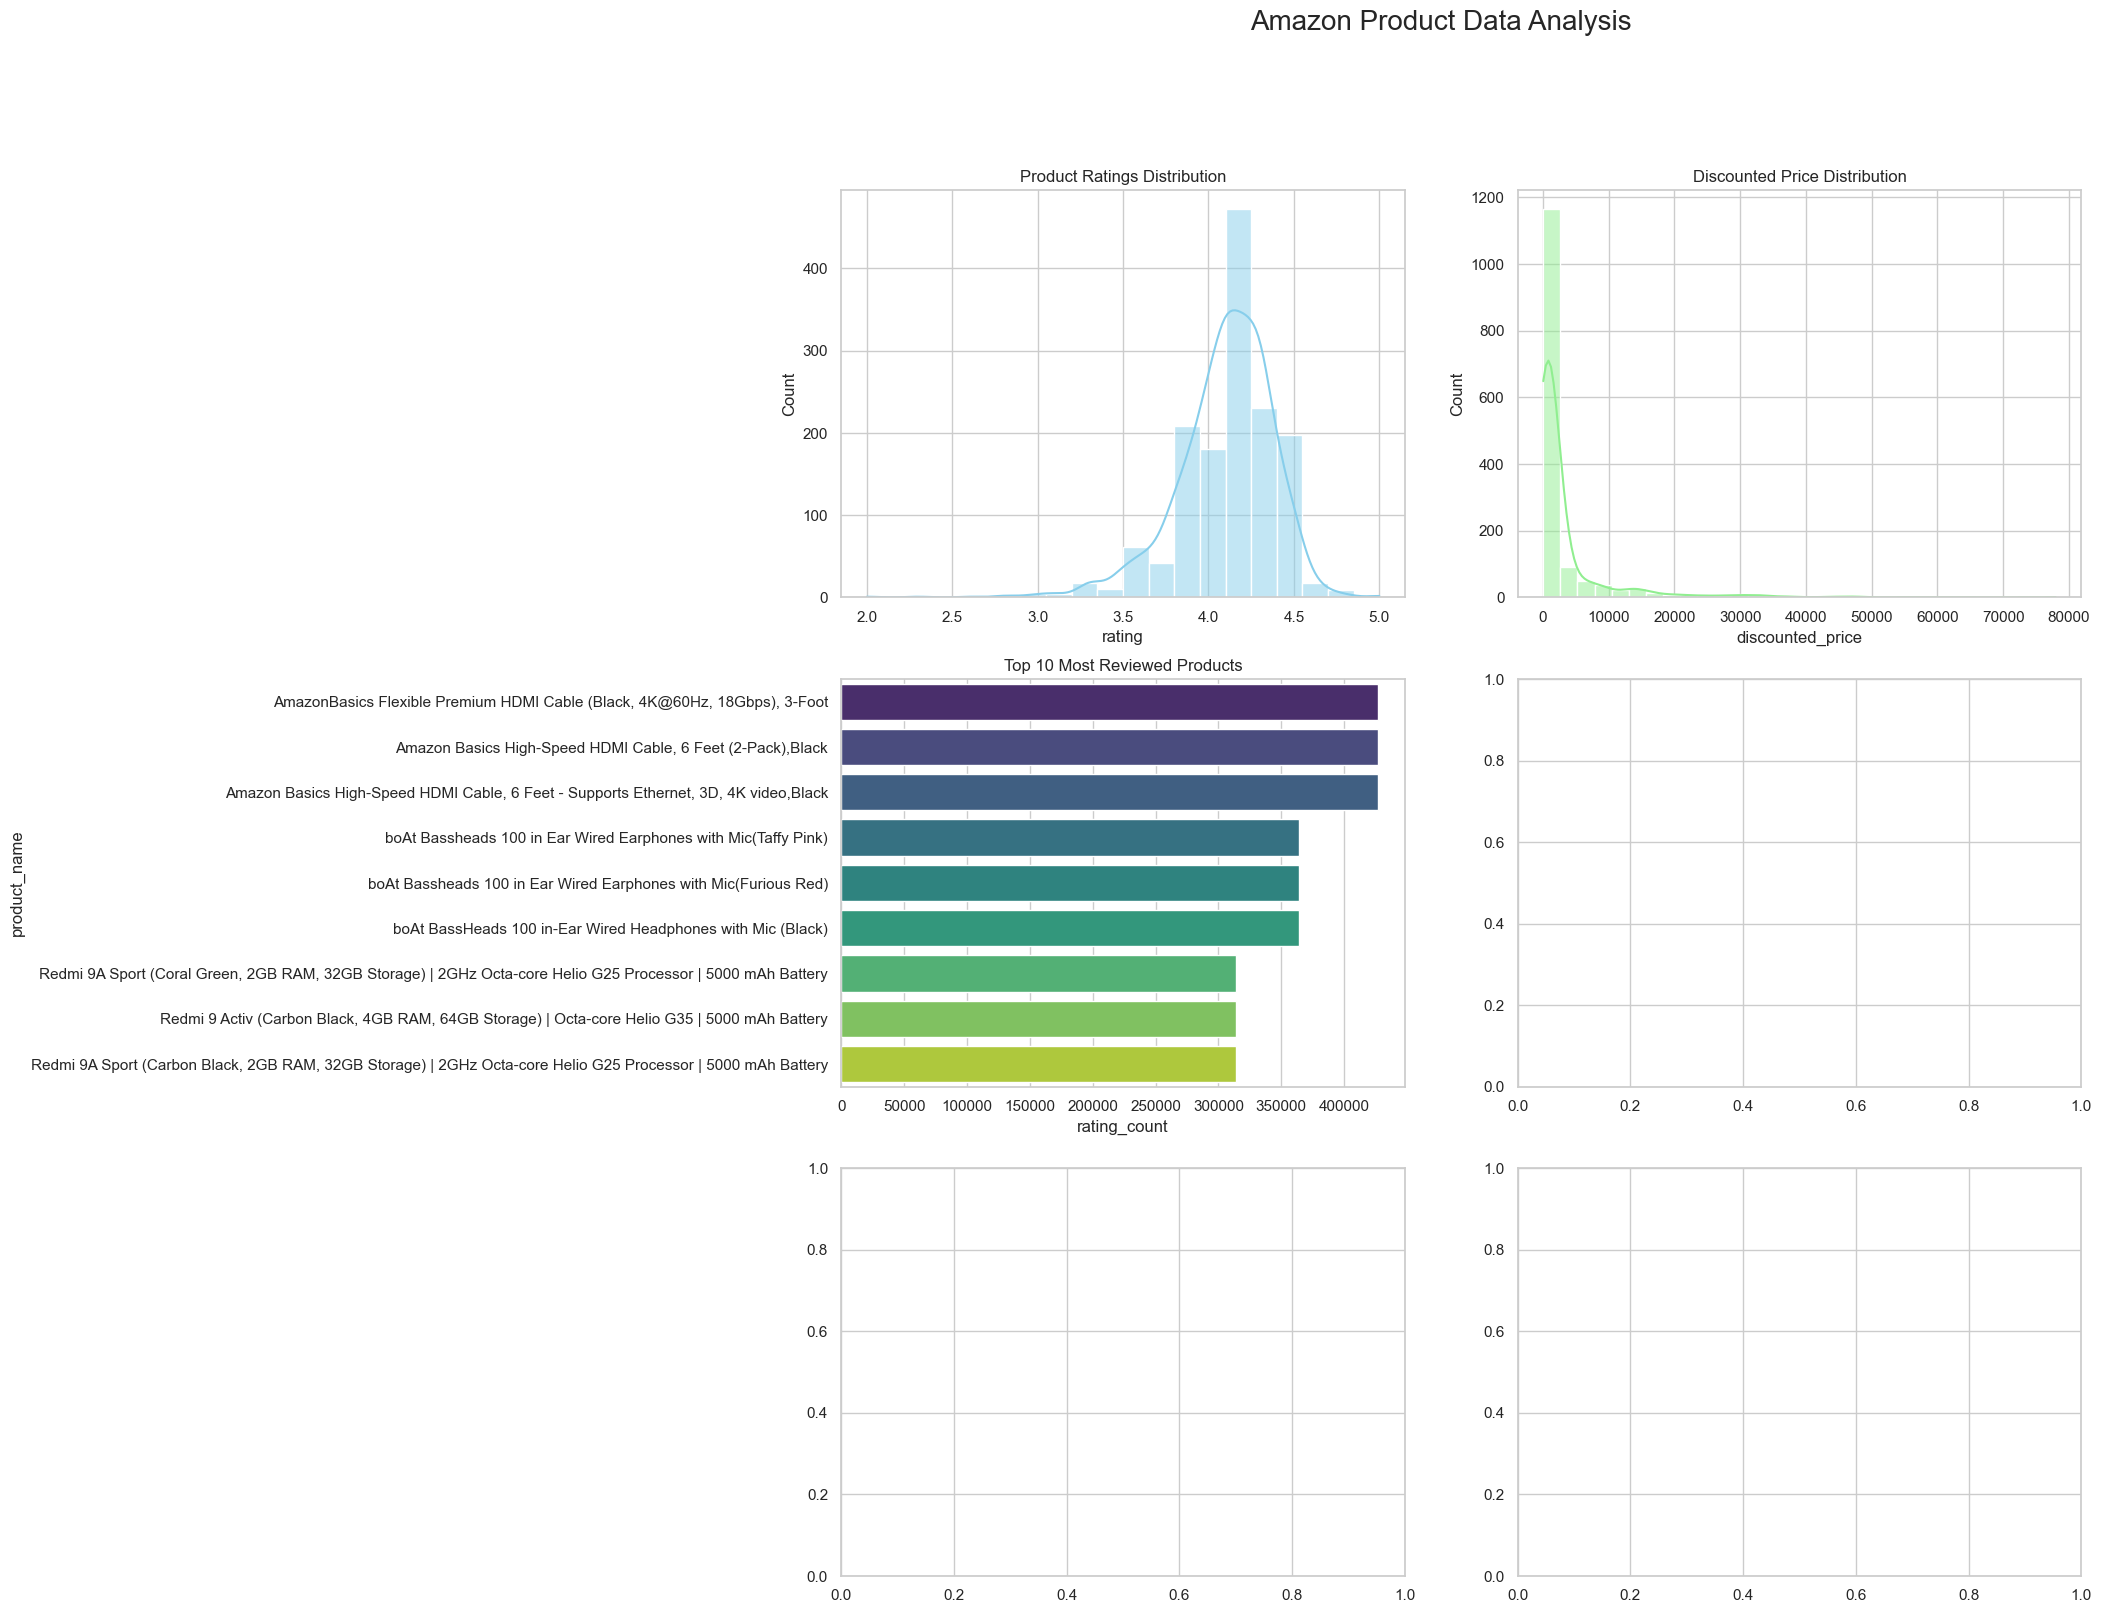

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Amazon Product Data Analysis", fontsize=20)


sns.histplot(df['rating'], bins=20, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Product Ratings Distribution")


sns.histplot(df['discounted_price'], bins=30, kde=True, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title("Discounted Price Distribution")


top_reviews = df.sort_values(by='rating_count', ascending=False).head(10)
sns.barplot(data=top_reviews, y="product_name", x="rating_count", ax=axs[1, 0], palette="viridis")
axs[1, 0].set_title("Top 10 Most Reviewed Products")

C:\Users\kanis\AppData\Local\Temp\ipykernel_20452\3452048039.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reviews, y="product_name", x="rating_count", ax=axs[1, 0], palette="viridis")


Text(0.5, 1.0, 'Boxplot of Discount Percentage')

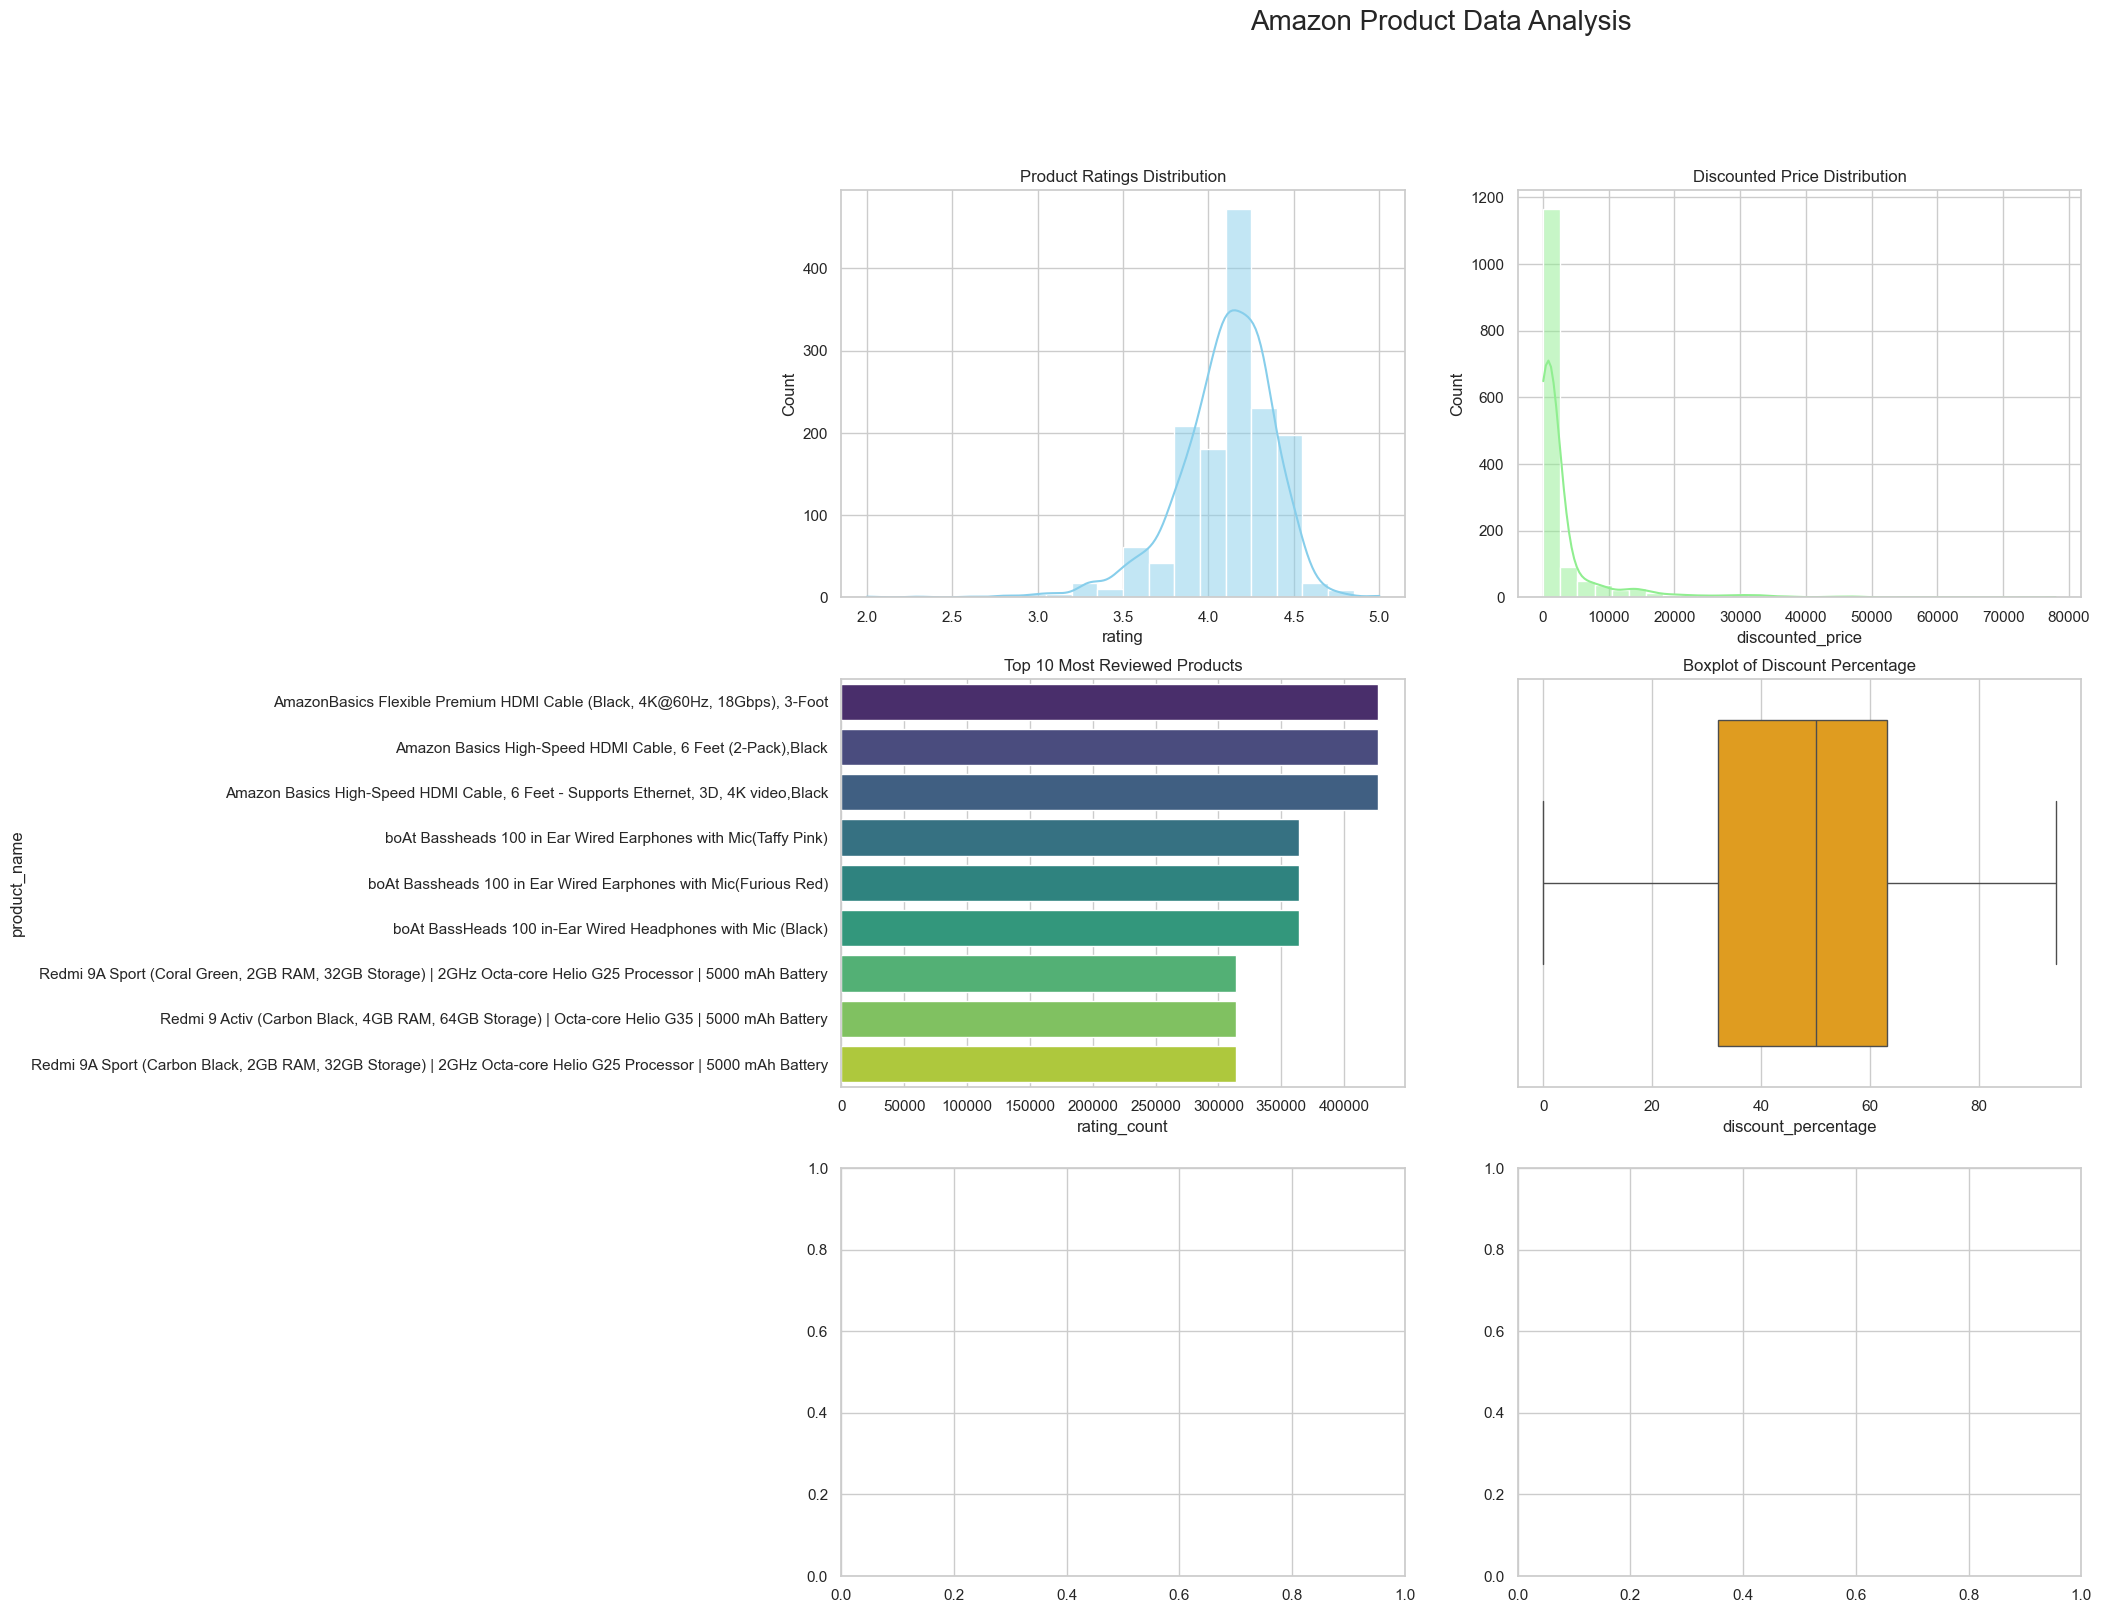

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Amazon Product Data Analysis", fontsize=20)


sns.histplot(df['rating'], bins=20, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Product Ratings Distribution")


sns.histplot(df['discounted_price'], bins=30, kde=True, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title("Discounted Price Distribution")


top_reviews = df.sort_values(by='rating_count', ascending=False).head(10)
sns.barplot(data=top_reviews, y="product_name", x="rating_count", ax=axs[1, 0], palette="viridis")
axs[1, 0].set_title("Top 10 Most Reviewed Products")

sns.boxplot(data=df, x="discount_percentage", ax=axs[1, 1], color='orange')
axs[1, 1].set_title("Boxplot of Discount Percentage")

C:\Users\kanis\AppData\Local\Temp\ipykernel_20452\2504986253.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reviews, y="product_name", x="rating_count", ax=axs[1, 0], palette="viridis")
C:\Users\kanis\AppData\Local\Temp\ipykernel_20452\2504986253.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_avg.values, y=cat_avg.index, ax=axs[2, 0], palette="coolwarm")


Text(0.5, 1.0, 'Average Rating by Top Categories')

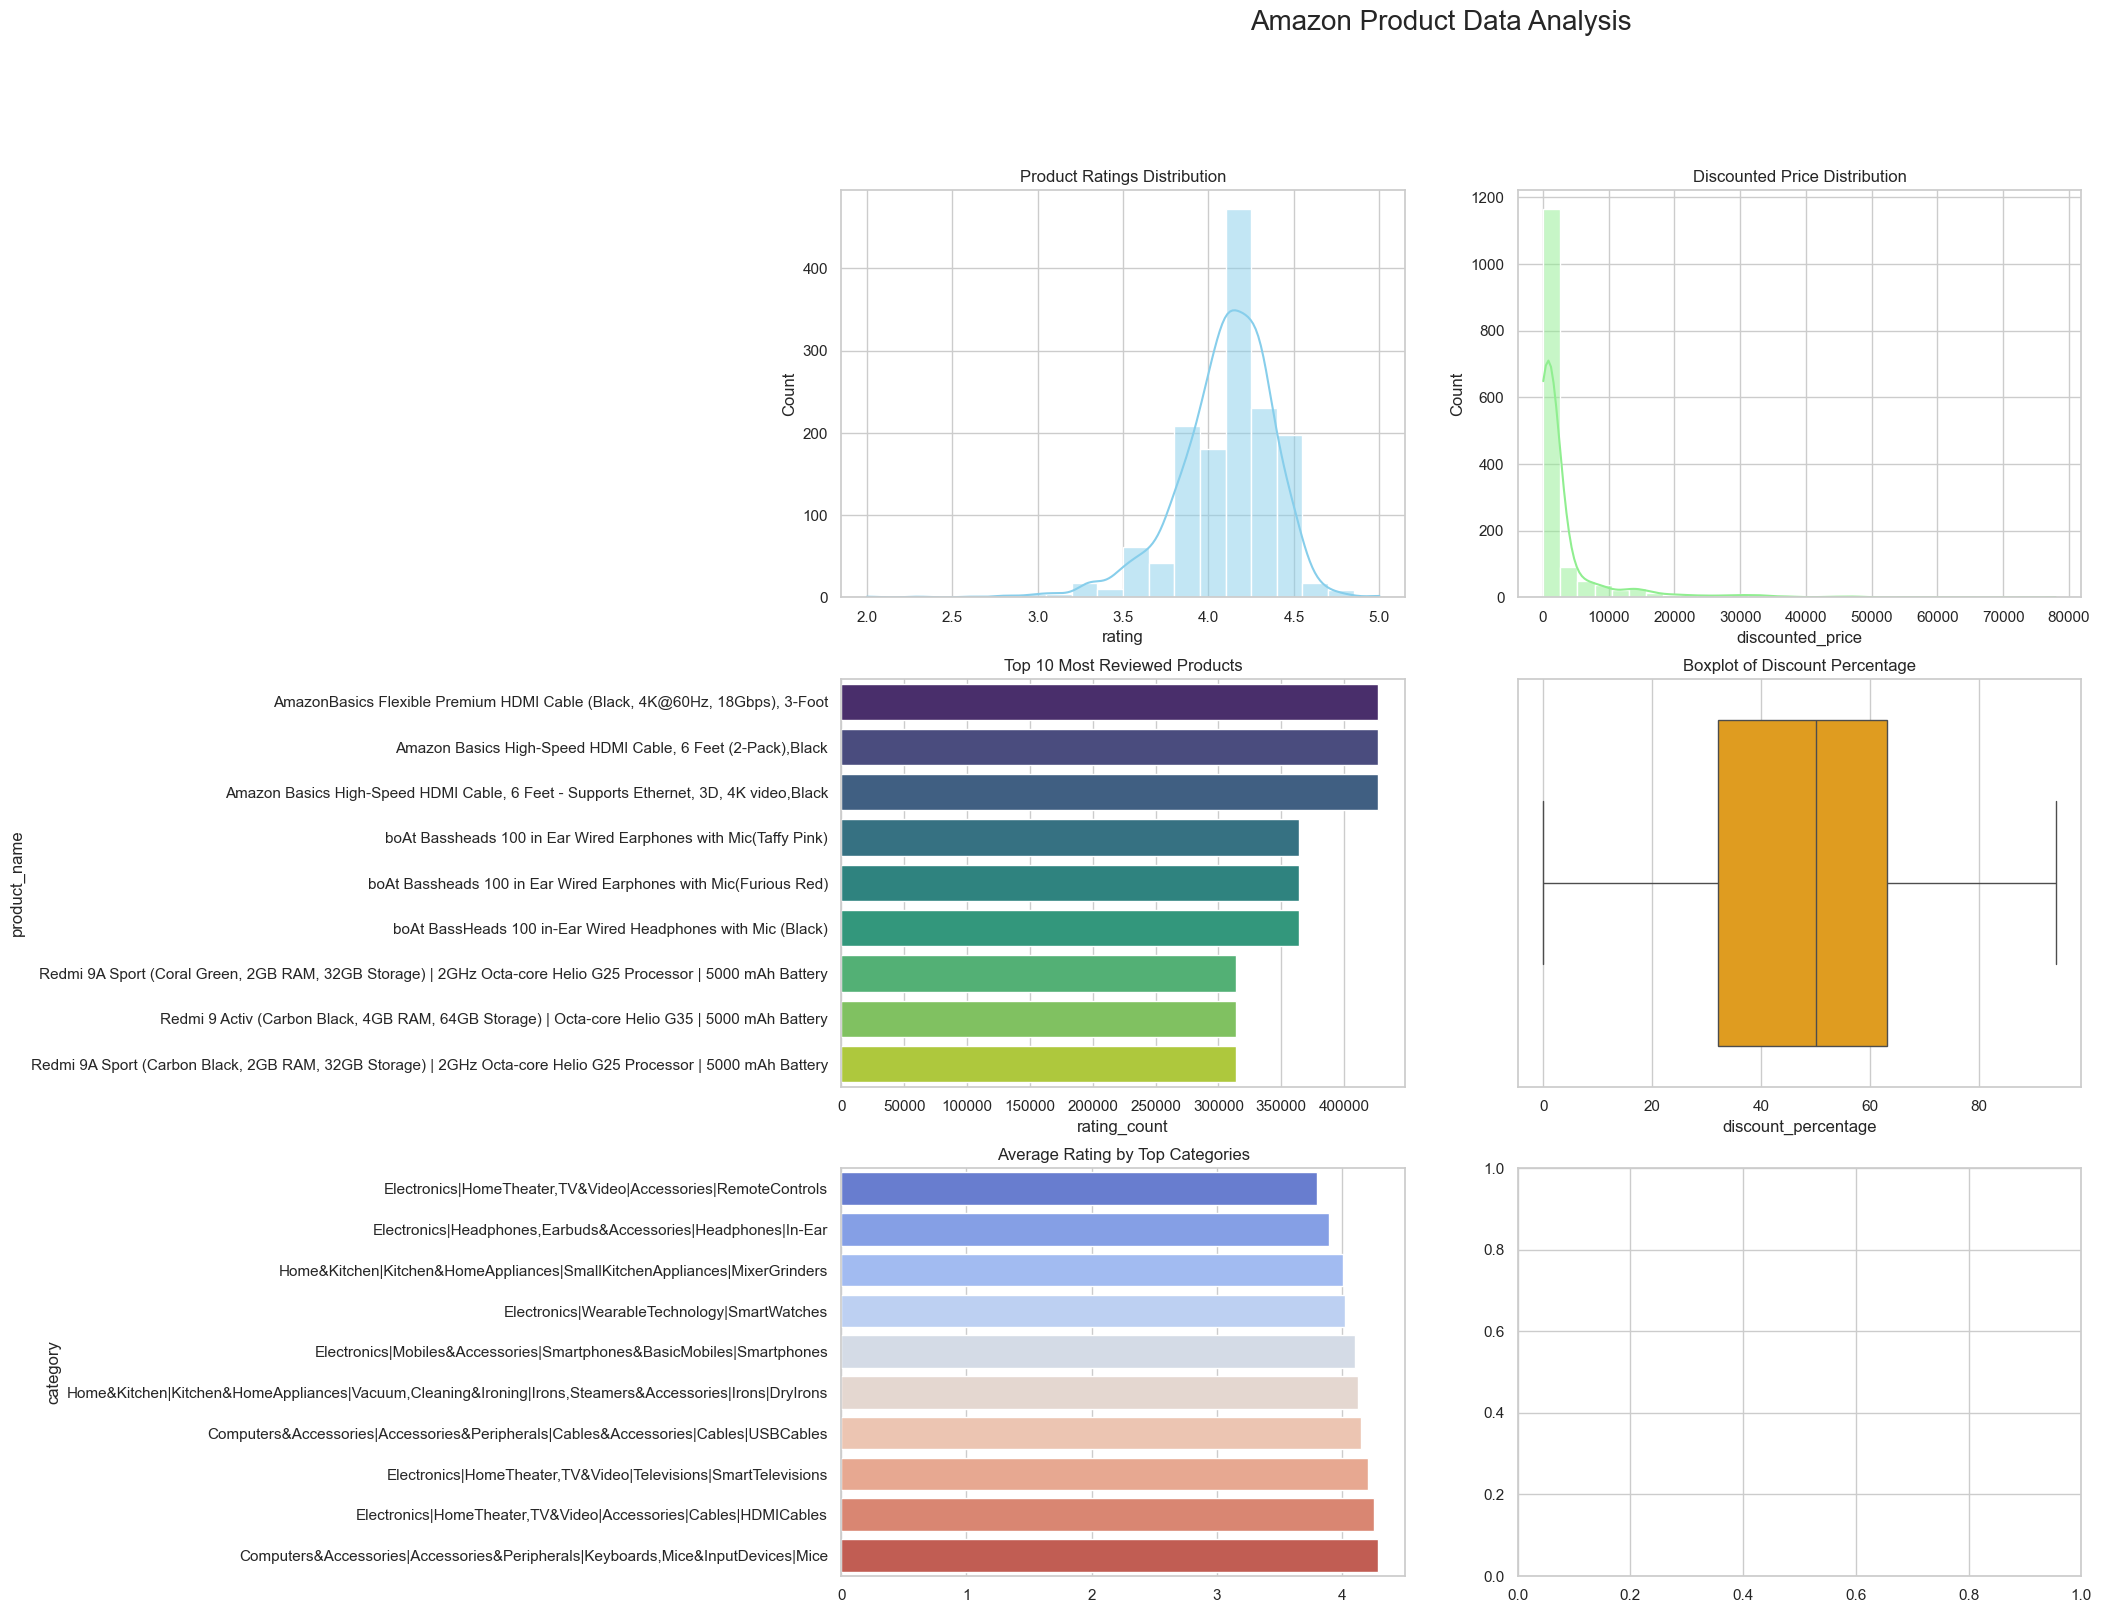

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Amazon Product Data Analysis", fontsize=20)


sns.histplot(df['rating'], bins=20, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Product Ratings Distribution")

sns.histplot(df['discounted_price'], bins=30, kde=True, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title("Discounted Price Distribution")


top_reviews = df.sort_values(by='rating_count', ascending=False).head(10)
sns.barplot(data=top_reviews, y="product_name", x="rating_count", ax=axs[1, 0], palette="viridis")
axs[1, 0].set_title("Top 10 Most Reviewed Products")


sns.boxplot(data=df, x="discount_percentage", ax=axs[1, 1], color='orange')
axs[1, 1].set_title("Boxplot of Discount Percentage")


top_cats = df['category'].value_counts().head(10).index
cat_avg = df[df['category'].isin(top_cats)].groupby("category")['rating'].mean().sort_values()
sns.barplot(x=cat_avg.values, y=cat_avg.index, ax=axs[2, 0], palette="coolwarm")
axs[2, 0].set_title("Average Rating by Top Categories")

C:\Users\kanis\AppData\Local\Temp\ipykernel_20452\4034525134.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reviews, y="product_name", x="rating_count", ax=axs[1, 0], palette="viridis")
C:\Users\kanis\AppData\Local\Temp\ipykernel_20452\4034525134.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_avg.values, y=cat_avg.index, ax=axs[2, 0], palette="coolwarm")


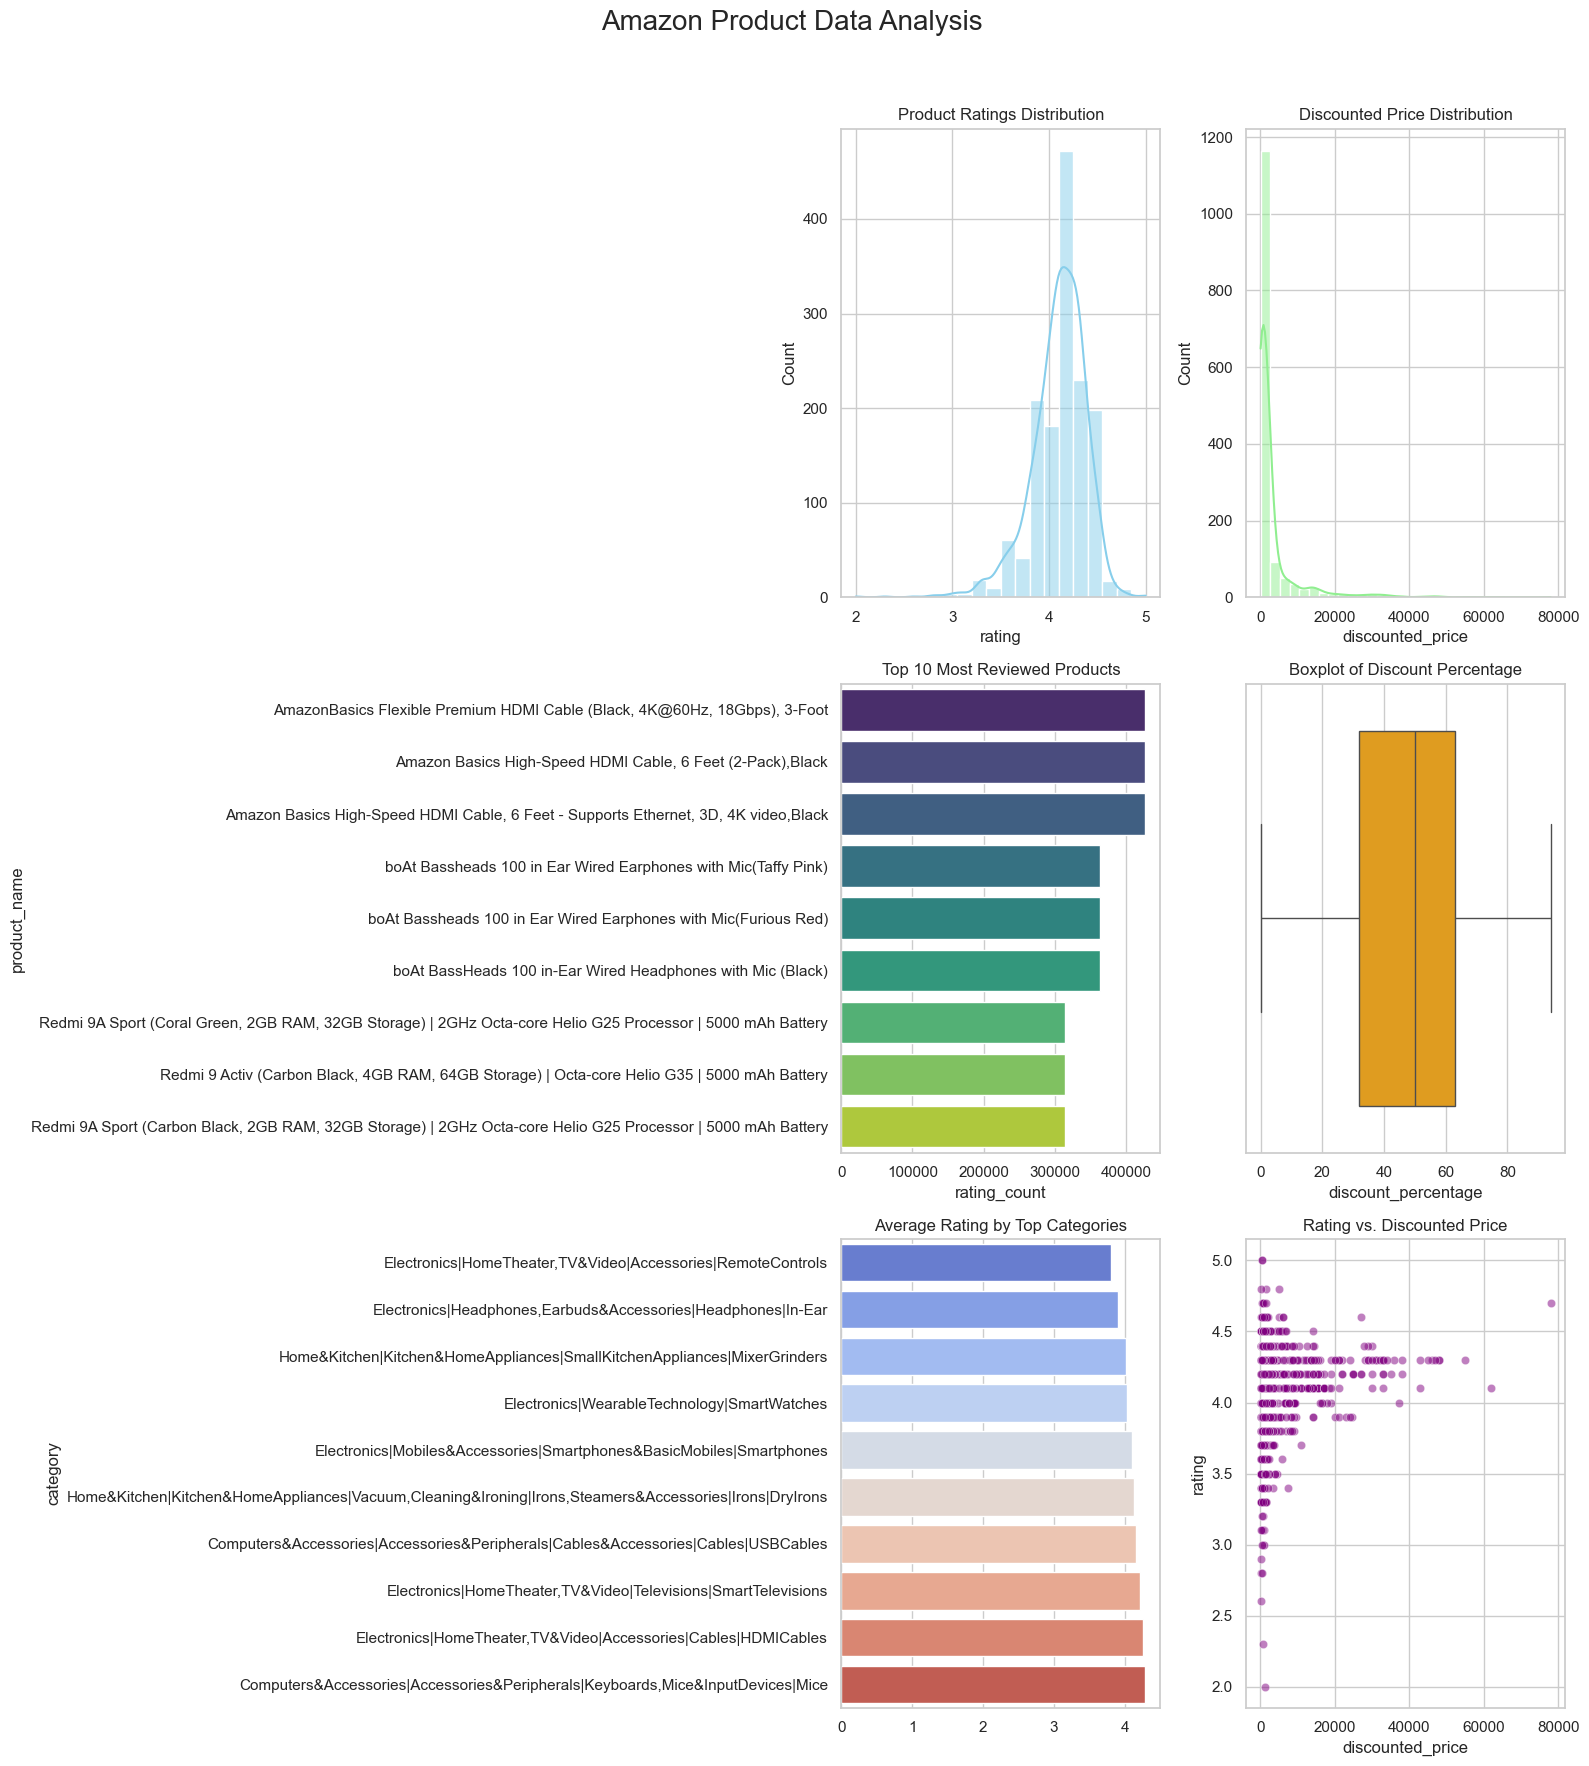

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Amazon Product Data Analysis", fontsize=20)


sns.histplot(df['rating'], bins=20, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Product Ratings Distribution")


sns.histplot(df['discounted_price'], bins=30, kde=True, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title("Discounted Price Distribution")


top_reviews = df.sort_values(by='rating_count', ascending=False).head(10)
sns.barplot(data=top_reviews, y="product_name", x="rating_count", ax=axs[1, 0], palette="viridis")
axs[1, 0].set_title("Top 10 Most Reviewed Products")


sns.boxplot(data=df, x="discount_percentage", ax=axs[1, 1], color='orange')
axs[1, 1].set_title("Boxplot of Discount Percentage")


top_cats = df['category'].value_counts().head(10).index
cat_avg = df[df['category'].isin(top_cats)].groupby("category")['rating'].mean().sort_values()
sns.barplot(x=cat_avg.values, y=cat_avg.index, ax=axs[2, 0], palette="coolwarm")
axs[2, 0].set_title("Average Rating by Top Categories")


sns.scatterplot(data=df, x="discounted_price", y="rating", ax=axs[2, 1], alpha=0.5, color='purple')
axs[2, 1].set_title("Rating vs. Discounted Price")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()